In [2]:
import requests as req
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from collections import Counter

In [96]:
def get_content(article_name):
    url = "https://en.wikipedia.org/w/api.php"

    params = {
        "action": "query",
        "format": "json",
        "titles": article_name,
        "prop": "revisions|info",
        "rvprop": "content",
        "rvslots": "main",
        "inprop": "url",
        "redirects": True
    }

    response = req.get(url, params=params)
    data = response.json()
    return data

In [105]:
def merge_contents(data):
    page_id = next(iter(data["query"]["pages"].keys()))
    content = data["query"]["pages"][page_id]["revisions"][0]["slots"]["main"]["*"]

    content = re.sub(r'\{\{.*?\}\}', '', content)
    content = re.sub(r'\[\[.*?\]\]', '', content)
    content = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', content)
    content = re.sub(r'[^a-zA-Z\s]', '', content)
    content = content.replace('\n', ' ')

    return content.strip()

data = get_content("Ozone_layer")
merge_content = merge_contents(data)
merge_content

'in the ozone layer  The ozone layer or ozone shield is a region of s  that  most of the s   radiation It contains a high concentration of  Osubsub in relation to other parts of the atmosphere although still small in relation to other gases in the stratosphere The ozone layer contains less than   of ozone while the average ozone concentration in Earths atmosphere as a whole is about  parts per million The ozone layer is mainly found in the lower portion of the stratosphere from approximately  above Earth although its thickness varies seasonally and geographicallyrefref  The ozone layer was discovered in  by French physicists  and  Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the  of a  with a temperature in the range of  except that there was no radiation below a  of about nbspnm at the  end of the spectrum It was deduced that the missing radiation was being absorbed by something in the atmospher

In [107]:
def tokenize(content):
    words = []
    splitters = [' ', '\n']

    for splitter in splitters:
        content = content.replace(splitter, ' ')
    words = content.split()
    return words

collection = tokenize(merge_content)
collection

In [110]:
def lower_collection(collection):
    return [word.lower() for word in collection]
lower_collection = lower_collection(collection)
lower_collection

In [114]:
def count_frequency(collection):
    return Counter(collection)
frequencies = count_frequency(collection)
frequencies

In [119]:
def print_most_frequent(frequencies, n = 20):
    most_common = frequencies.most_common(n)
    for word, freq in most_common:
        print(word +':', freq)
print_most_frequent(frequencies, 10)

the: 184
of: 102
ozone: 74
and: 74
in: 62
to: 62
is: 41
The: 29
a: 29
by: 29


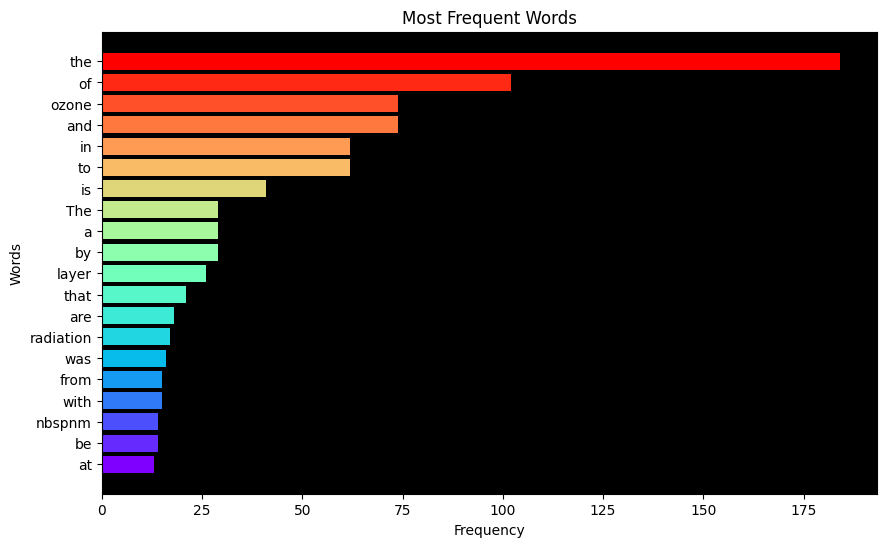

In [118]:
def plot_histogram(frequencies, n=12):
    most_common = frequencies.most_common(n)
    words, counts = zip(*most_common)
    words = list(reversed(words))
    counts = list(reversed(counts))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(words)))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(words, counts, color=colors)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Words')
    ax.set_title('Most Frequent Words')
    ax.set_facecolor('black')
    plt.show()

plot1 = plot_histogram(frequencies, 20)
plot1

In [121]:
def remove_stop_words(words, stop_words):
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

stop_words = ['a', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'for', 'if', 'in', 'into', 'is', 'it', 'no',
              'not', 'of', 'on', 'or', 'such', 'that', 'the', 'their', 'then', 'there', 'these', 'they', 'this', 'to', 'was', 'will', 'with']

filtered_collection = remove_stop_words(lower_collection, stop_words)
count2 = count_frequency(filtered_collection)
count2

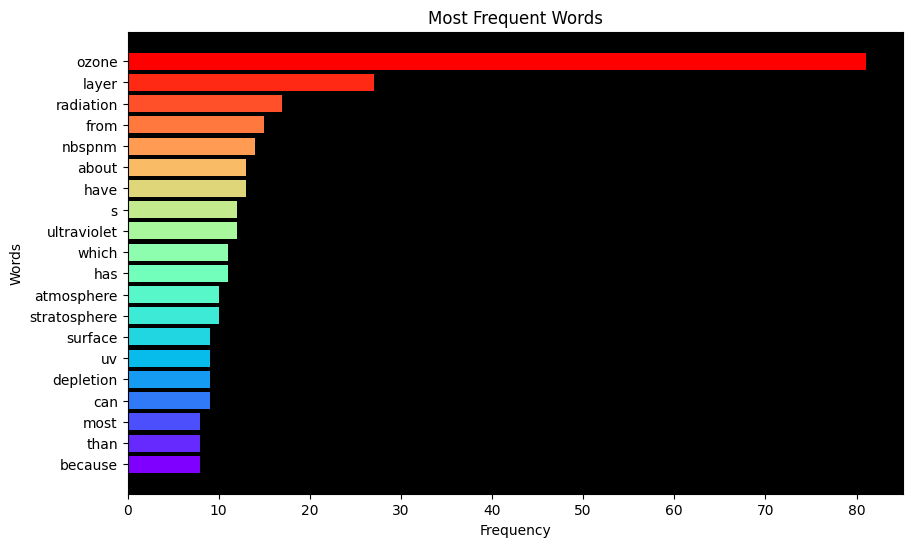

In [122]:
plot2 = plot_histogram(count2, 20)